# Millennium Simulation Data Consistency Check: Overlaying Foreground galaxies on Ray-traced Shear and Convergence Maps

We must make sure that our galaxy/halo catalogs are read in correctly before we try and use them. In this demo we make plots of the ray-traced convergence and shear fields, and then overlay the associated foreground galaxies, sized by their stellar mass.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import scipy as sp
import os,sys
import astropy.io.fits as pyfits
import matplotlib.pyplot as plt
import cmath
%matplotlib inline

In [3]:
# Pangloss:
PANGLOSS_DIR = os.path.expandvars("$PANGLOSS_DIR")
sys.path.append(PANGLOSS_DIR)
import pangloss

In [4]:
K = pangloss.Kappamap(PANGLOSS_DIR+'/data/GGL_los_8_0_0_N_4096_ang_4_rays_to_plane_37_f.kappa',FITS=False)

In [5]:
S = pangloss.Shearmap([PANGLOSS_DIR+'/data/GGL_los_8_0_0_N_4096_ang_4_rays_to_plane_37_f.gamma_1',PANGLOSS_DIR+'/data/GGL_los_8_0_0_N_4096_ang_4_rays_to_plane_37_f.gamma_2'],FITS=False)

In [6]:
config = pangloss.Configuration(PANGLOSS_DIR+'/example/example.config')
F = pangloss.ForegroundCatalog(PANGLOSS_DIR+'/data/GGL_los_8_0_0_0_0_N_4096_ang_4_Guo_galaxies_on_plane_27_to_63.images.txt',config)

In [7]:
B = pangloss.BackgroundCatalog(sigma_e=0.5) # High ellipticity used to highlight the intrinsic shape of background sources

KeyboardInterrupt: 

Now we have all the data we need, let's plot the maps and overlay the galaxies - first on the whole catalog, and then in a zoomed-in view.

In [ ]:
K.plot()
S.plot()

In [ ]:
# Now works with subplots
K.plot(subplot=[1.65,1.5,-1.65,-1.5])
S.plot(subplot=[1.65,1.5,-1.65,-1.5])

In [ ]:
# The shearmap can also figure out the subplot from Kappamap if nothing is passed!
K.plot(subplot=[1.65,1.5,-1.65,-1.5])
S.plot()

In [ ]:
# If different subplots are passed, the Kappamap subplot is viewed and the overlapping shear sticks are plotted.
K.plot(subplot=[1.65,1.5,-1.65,-1.5])
S.plot(subplot=[1.65,1.5,-1.65,-1.55])

Now adding catalogs:

In [ ]:
# Whole (0,0) field:
K.plot(subplot=[2,1,-2,-1])
S.plot()
F.plot(mass_lim=[10**11,10**12])

In [ ]:
# Zoomed in:
K.plot(fig_size=10,subplot=[1.6,1.4,-1.7,-1.5])
S.plot()
F.plot(mass_lim=[10**10.7,10**12])

However, `ForegroundCatalog` instances can plot themselves without any maps:

In [ ]:
F.plot(mass_lim=[10**10.75,10**12])

We can also add a generated background catalog of galaxies to the overlays:

In [ ]:
K.plot(fig_size=10,subplot=[1.6,1.4,-1.7,-1.5])
S.plot()
F.plot(mass_lim=[10**10.75,10**12])
B.plot(mass_lim=[10**11.95,10**12])

The background galaxies by default plot as points as there are so numerous (notice the very small mass range allowed in the previous plot). However, they can also be plotted as ellipses to show their intrinsic shape using the optional parameter `graph='ellipse'`. The foreground and background galaxies use the same mass scaling for plotting.

In [ ]:
K.plot(fig_size=10,subplot=[1.6,1.4,-1.7,-1.5])
S.plot()
F.plot(mass_lim=[10**10.75,10**12])
B.plot(mass_lim=[10**11.95,10**12],graph='ellipse')

Like foreground catalogs, a background catalog can also plot itself when no maps are present.

In [ ]:
B.plot(mass_lim=[10**11.99,10**12])

## Scratch pad

In [19]:
B = pangloss.BackgroundCatalog(e_mod_lim=[0,0.001])

In [20]:
#B.plot(fig_size=15,subplot=[2,1.75,-2,-1.75],mass_lim=[10**11.95,10**12],graph='ellipse')

In [21]:
#B = pangloss.BackgroundCatalog()

N =  1.0
pix_Lx =  51.2
pix_ly =  20.48
Lx =  0.05
Ly =  0.02


102.4

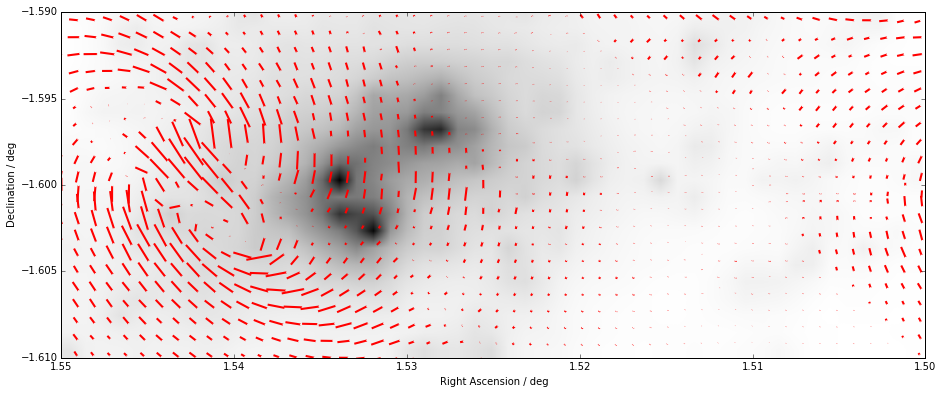

In [23]:
# NEED TO FIX!, figsize as well
K.plot(fig_size=15,subplot=[1.55,1.50,-1.61,-1.59])
S.plot()
#F.plot(mass_lim=[10**10.7,10**12])
#B.plot(mass_lim=[10**10.8,10**11.3],graph='ellipse',lensed='both')
.1/K.PIXSCALE[0]

N =  2.0
pix_Lx =  102.4
pix_ly =  102.4
Lx =  0.1
Ly =  0.1


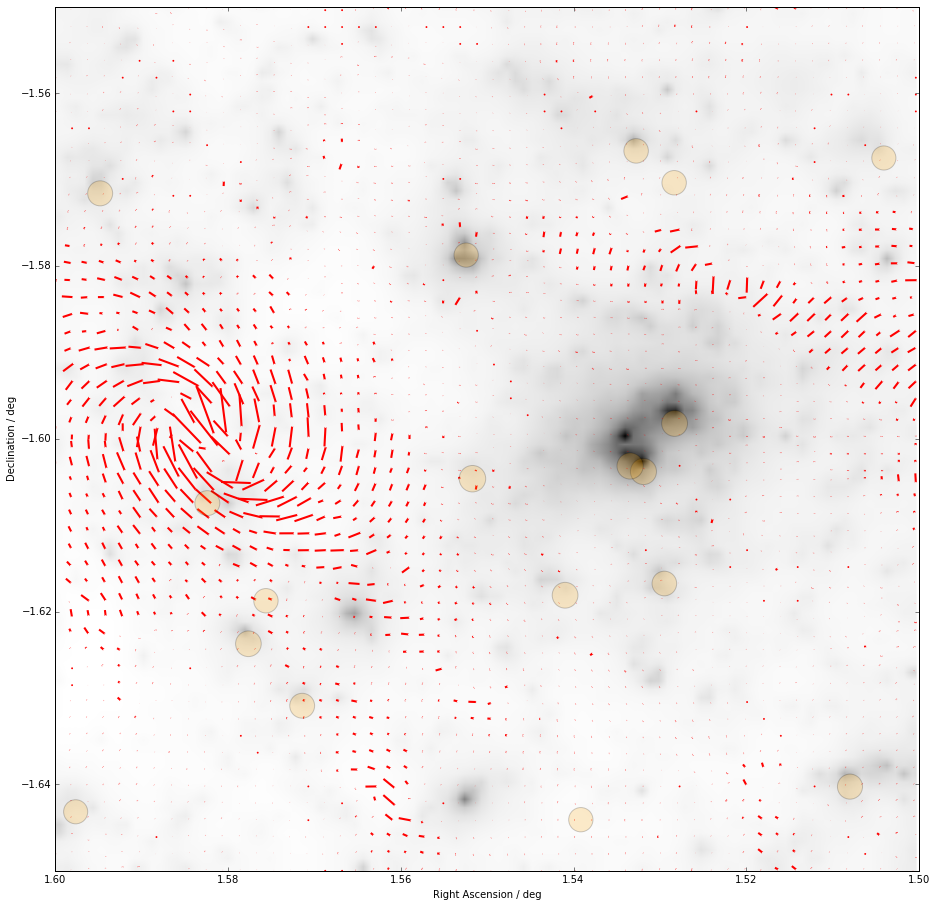

In [25]:
K.plot(fig_size=15,subplot=[1.6,1.5,-1.65,-1.55])
S.plot()
F.plot(mass_lim=[10**10.7,10**12])
#B.plot(mass_lim=[10**11.95,10**12],graph='ellipse',lensed='both')

N =  5.0
pix_Lx =  204.8
pix_ly =  204.8
Lx =  0.2
Ly =  0.2
      eMod      
----------------
 0.0421413252321
  0.015375391164
 0.0273803045892
 0.0415136782241
 0.0297705449402
 0.0034794758194
 0.0414811639897
0.00349971030742
 0.0121824753255
 0.0339315063282
             ...
  0.010864525355
 0.0460885691091
0.00965461496393
 0.0143022547516
 0.0124617391486
 0.0234985402928
  0.032786129099
0.00539039402959
 0.0305623891476
 0.0232136936141
 0.0465652630082
Length = 576000 rows


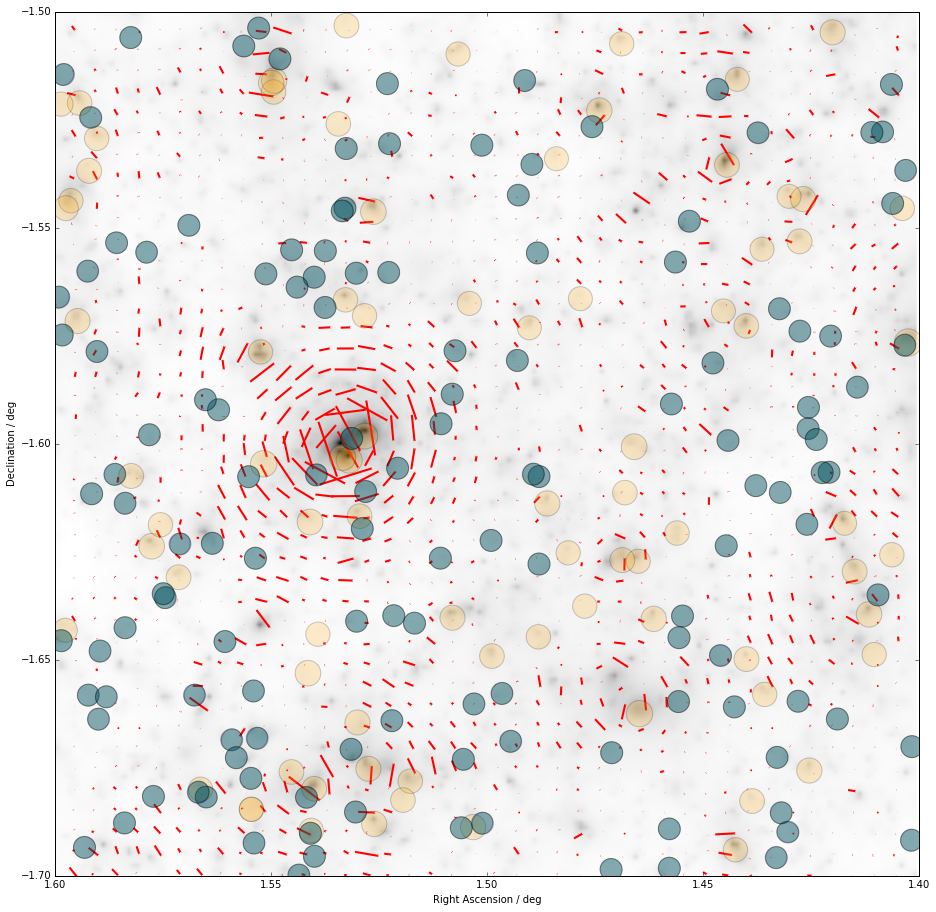

In [33]:
K.plot(fig_size=15,subplot=[1.6,1.4,-1.7,-1.5])
S.plot()
F.plot(mass_lim=[10**10.7,10**12])
B.plot(mass_lim=[10**11.95,10**12],graph='ellipse',lensed='both')
print B.galaxies['eMod']

N =  3.0
pix_Lx =  153.6
pix_ly =  153.6
Lx =  0.15
Ly =  0.15


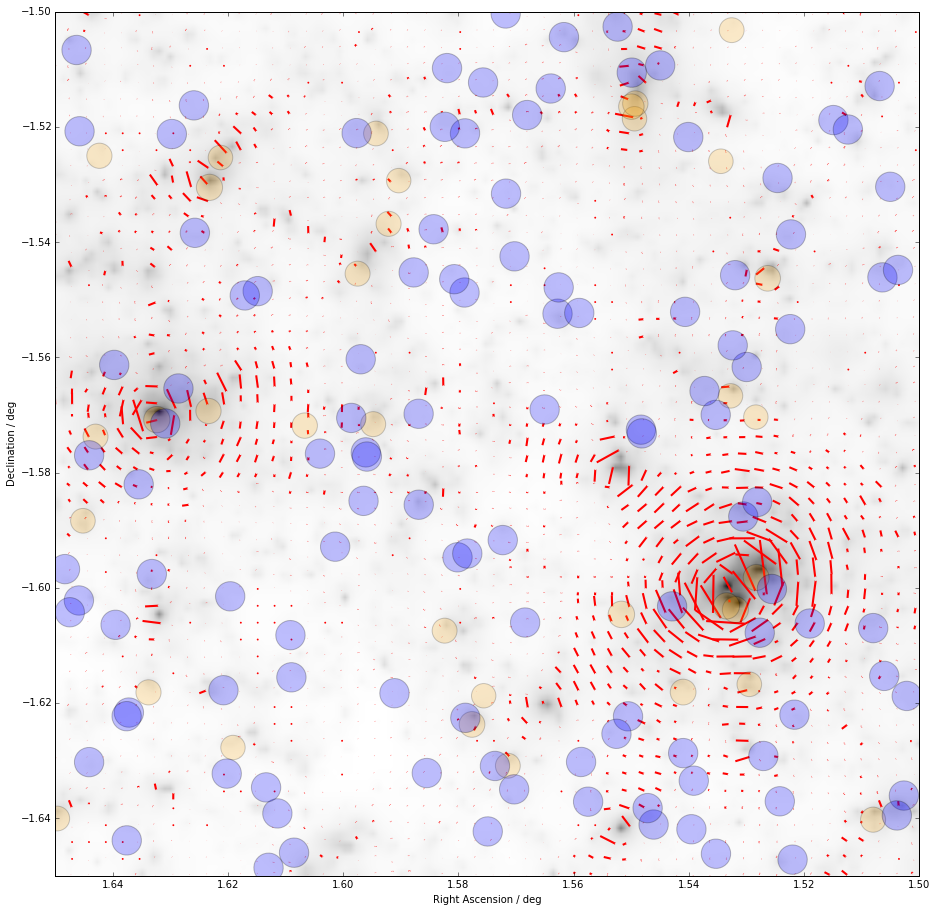

In [27]:
K.plot(fig_size=15,subplot=[1.65,1.5,-1.65,-1.5])
S.plot()
F.plot(mass_lim=[10**10.75,10**12])
B.plot(mass_lim=[10**10.8,10**11.3],graph='ellipse',lensed=False)

### Shearmap bug:

N =  1
pix_Lx =  30.72
pix_ly =  20.48
Lx =  0.03
Ly =  0.02


(0.0009765625, 0.0009765625)

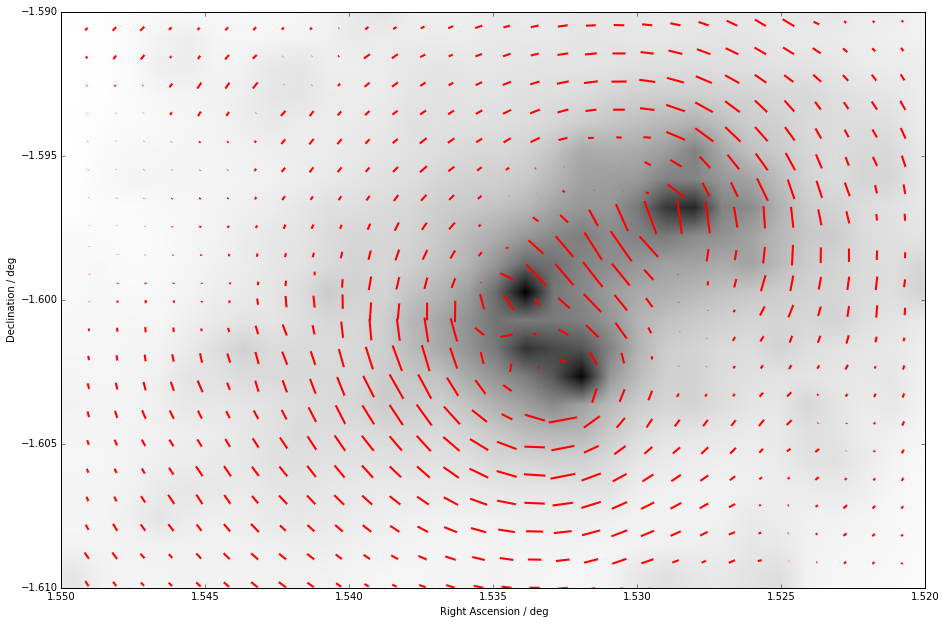

In [28]:
K.plot(fig_size=15,subplot=[1.55,1.52,-1.61,-1.59])
S.plot()
K.world2image(1.54,-1.61),K.world2image(1.52,-1.59)
K.PIXSCALE[0],S.PIXSCALE[0]

N =  2.0
pix_Lx =  102.4
pix_ly =  102.4
Lx =  0.1
Ly =  0.1


(0.0009765625, 0.0009765625)

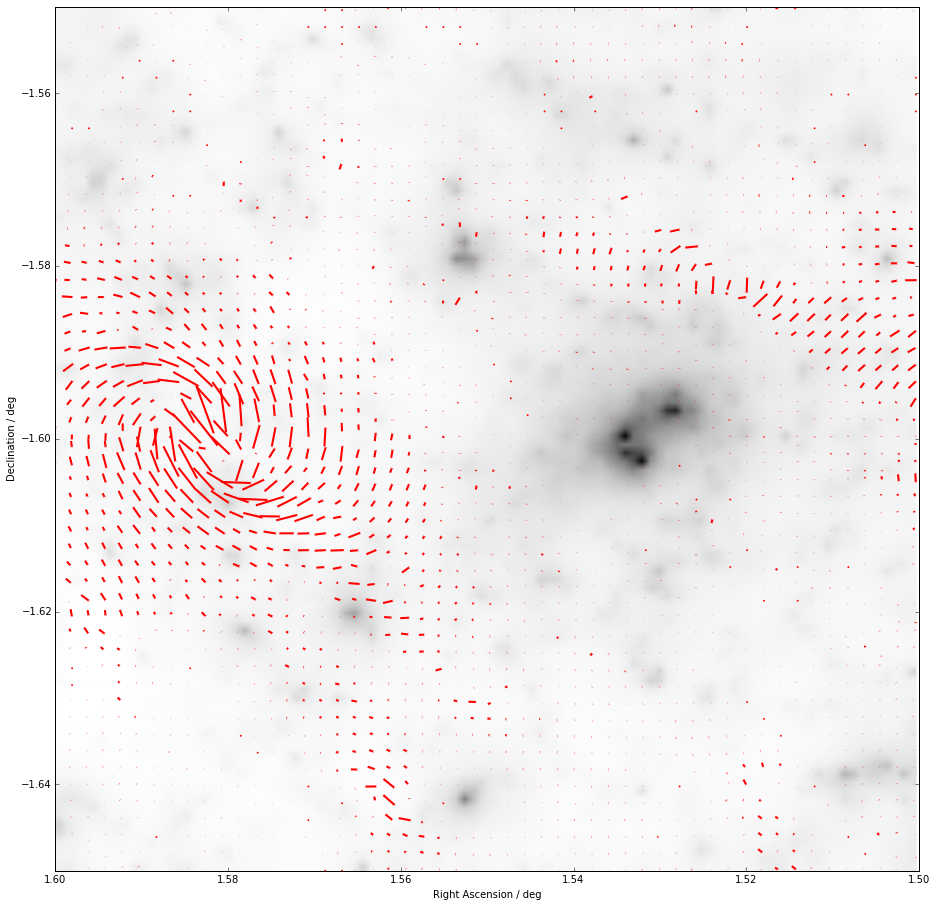

In [29]:
K.plot(fig_size=15,subplot=[1.6,1.5,-1.65,-1.55])
S.plot(fig_size=15,subplot=[1.6,1.5,-1.65,-1.55])
K.PIXSCALE[0],S.PIXSCALE[0]

### BackgroundCatalog Sticks:

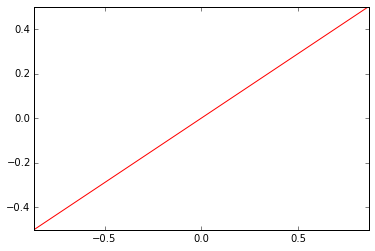

In [364]:
import random

#x, y = range(0,10,2), range(0,10,2)
x,y = [0],[0]
stick_size = 1
#phi = np.deg2rad(np.random.uniform(0,180,len(x)))
phi = np.deg2rad([30])

pt1 = np.zeros(len(x),dtype=tuple)
pt2 = np.zeros(len(x),dtype=tuple)
lines = np.zeros(len(x),dtype=tuple)

for i in range(len(x)):
    pt1[i] = (x[i]-stick_size*np.cos(phi[i]), y[i]-stick_size*np.sin(phi[i]))
    pt2[i] = (x[i]+stick_size*np.cos(phi[i]), y[i]+stick_size*np.sin(phi[i]))
    lines[i] = tuple([pt1[i],pt2[i]])
    
lines = tuple(lines)

color = 'red'

collection = LineCollection(lines,linestyles='solid',color=color)

fig = plt.figure()
ax = plt.gca()
#subplt = fig.add_subplot(111,aspect='equal')
ax.add_collection(collection)
#subplt.axis([-1,3,-1,3])
ax.autoscale_view(True,True,True)


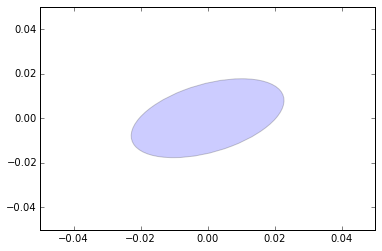

In [55]:
pangloss.plotting.plot_ellipse(0,0,.05,.5,30,plt.gca(),'blue',0.2)
plt.gca().autoscale_view(True,True,True)

## By-Hand Lensing Calculations

In [38]:
B = pangloss.BackgroundCatalog(domain=[1.55,1.52,-1.61,-1.59],sigma_e=0.01)
B.lens_by_map(K,S)

In [39]:
domain = [1.55,1.52,-1.61,-1.59]
galaxies = B.return_galaxies(ra_lim=[1.55,1.52],dec_lim=[-1.61,-1.59],mass_lim=[10**11,10**12])

i = 5
ra = np.rad2deg(galaxies['RA'][i])
print 'RA: ',ra
dec = np.rad2deg(galaxies['Dec'][i])
print 'Dec: ',dec
mass = galaxies['Mstar_obs'][i]
print 'mass: ',mass
mag = galaxies['mag'][i]
print 'mag: ',mag
eMod_int = galaxies['eMod_int'][i]
print 'eMod_int: ',eMod_int
eMod = galaxies['eMod'][i]
print 'eMod: ',eMod
ePhi_int = galaxies['ePhi_int'][i]
print 'ePhi_int: ',ePhi_int
ePhi = galaxies['ePhi'][i]
print 'ePhi: ',ePhi
e1_int = galaxies['e1_int'][i]
print 'e1_int: ',e1_int
e1 = galaxies['e1'][i]
print 'e1: ',e1
e2_int = galaxies['e2_int'][i]
print 'e2_int: ',e2_int
e2 = galaxies['e2'][i]
print 'e2: ',e2
kappa = K.at(ra,dec,mapfile=0)
print 'kappa: ',kappa
gamma1 = S.at(ra,dec,mapfile=0)
print 'gamma1: ',gamma1
gamma2 = S.at(ra,dec,mapfile=1)
print 'gamma2: ',gamma2

RA:  1.53742111683
Dec:  -1.59205171518
mass:  291433226072.0
mag:  10.363053728
eMod_int:  0.0179400485784
eMod:  0.0953372275087
ePhi_int:  17.1032919321
ePhi:  25.7727720115
e1_int:  0.0148367068519
e1:  0.0592894924737
e2_int:  0.010085508058
e2:  0.0746588442935
kappa:  0.0464178707259
gamma1:  0.0424999039771
gamma2:  0.0616406605205


"\n# Plotting ellipse/stick by hand\nscale = 0.5            \nfloor = 0.01\nsize = 0.01*(scale*(scale > 0) + floor)\n\nq = (1-eMod)/(1+eMod)\nellipse = Ellipse(xy=[1.533,-1.596],width=size,height=np.sqrt(q)*size,angle=30)\naxis = plt.gca()\naxis.add_artist(ellipse)      \nellipse.set_clip_box(axis.bbox)\nellipse.set_alpha(0.3)\nellipse.set_facecolor('purple')\n\npangloss.plotting.plot_sticks(1.533,-1.596,eMod,30,axis,'purple')\n"

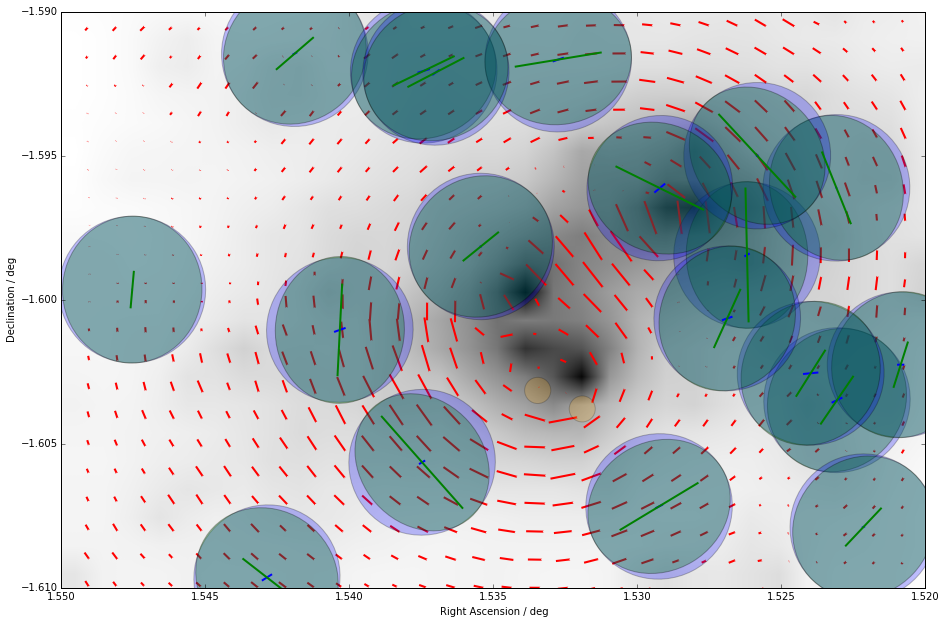

In [40]:

from matplotlib.patches import Ellipse

s =[1.55,1.52,-1.61,-1.59]
#s = [ra+0.05,ra-0.05,dec-0.05,dec+0.05]
K.plot(fig_size=15,subplot=s)
S.plot()
F.plot(mass_lim=[10**11,10**12])
B.plot(mass_lim=[10**11,10**12],graph='ellipse',lensed='both')
B.plot(mass_lim=[10**11,10**12],graph='stick',lensed='both')
#plt.scatter(ra,dec,color='green',s=200)
#print 'ePhi_int: ',ePhi_int,'ePhi: ',ePhi

'''
# Plotting ellipse/stick by hand
scale = 0.5            
floor = 0.01
size = 0.01*(scale*(scale > 0) + floor)

q = (1-eMod)/(1+eMod)
ellipse = Ellipse(xy=[1.533,-1.596],width=size,height=np.sqrt(q)*size,angle=30)
axis = plt.gca()
axis.add_artist(ellipse)      
ellipse.set_clip_box(axis.bbox)
ellipse.set_alpha(0.3)
ellipse.set_facecolor('purple')

pangloss.plotting.plot_sticks(1.533,-1.596,eMod,30,axis,'purple')
'''

"\n# Plotting ellipse/stick by hand\nscale = 0.5            \nfloor = 0.01\nsize = 0.01*(scale*(scale > 0) + floor)\n\naxis = plt.gca()\npangloss.plotting.plot_sticks(1.533,-1.596,eMod,30,axis,'purple')\n"

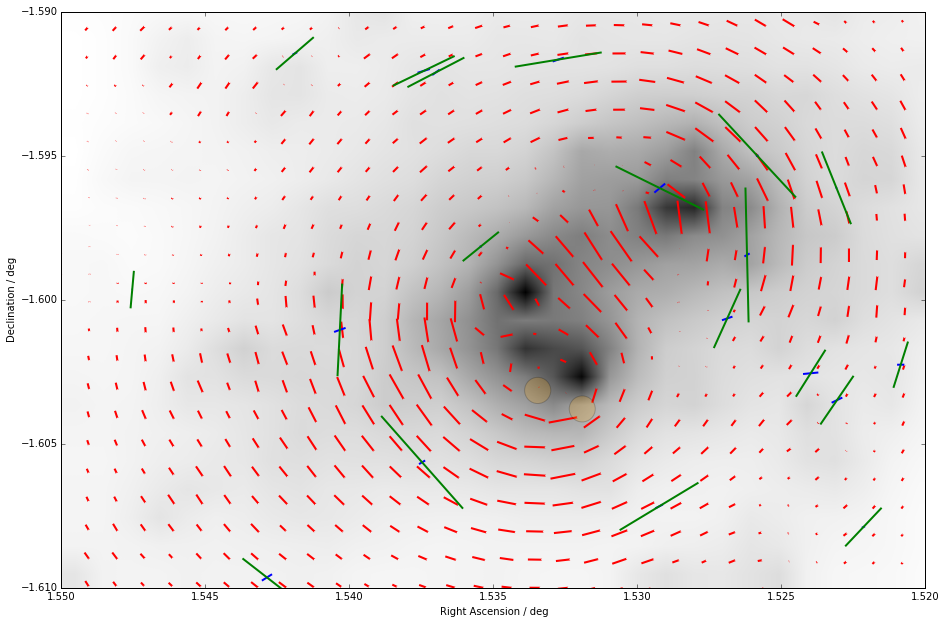

In [41]:

from matplotlib.patches import Ellipse

s = [1.55,1.52,-1.61,-1.59]
#s = [ra+0.05,ra-0.05,dec-0.05,dec+0.05]
K.plot(fig_size=15,subplot=s)
S.plot()
F.plot(mass_lim=[10**11,10**12])
#B.plot(mass_lim=[10**11,10**12],graph='ellipse',lensed='both')
B.plot(mass_lim=[10**11,10**12],graph='stick',lensed='both')
#plt.scatter(ra,dec,color='green',s=200)
'''
# Plotting ellipse/stick by hand
scale = 0.5            
floor = 0.01
size = 0.01*(scale*(scale > 0) + floor)

axis = plt.gca()
pangloss.plotting.plot_sticks(1.533,-1.596,eMod,30,axis,'purple')
'''

In [42]:
g = (gamma1+1j*gamma2)/(1.0-kappa)
print 'kappa, gamma1, gamma2: ',kappa,gamma1,gamma2
print 'g: ',g
gMod = abs(g)
gPhi = 0.5*np.rad2deg(cmath.phase(g))
gPhi2 = 0.5*np.rad2deg(np.arctan2(g.imag,g.real))
print 'gMod: ',gMod
print 'gPhi: ',gPhi
print 'gPhi2: ',gPhi2

kappa, gamma1, gamma2:  0.0464178707259 0.0424999039771 0.0616406605205
g:  (0.0445686875544+0.064641165798j)
gMod:  0.0785165474665
gPhi:  27.7072878181
gPhi2:  27.7072878181


In [43]:
g_conj = g.conjugate()
print 'g_conj: ',g_conj

g_conj:  (0.0445686875544-0.064641165798j)


In [44]:
e_int = e1_int+1j*e2_int
print 'e_int: ',e_int

e_int:  (0.0148367068519+0.010085508058j)


In [45]:
e = (e_int+g)/(1.0+g_conj*e_int)
print 'e: ',e

e:  (0.0592894924737+0.0746588442935j)


In [46]:
e1_calc, e2_calc = e.real, e.imag
e1_int,e2_int = e_int.real,e_int.imag
print 'e1_calc: ',e1_calc
print 'e1_int:',e1_int
print 'e2_calc: ',e2_calc
print 'e2_int:',e2_int

e1_calc:  0.0592894924737
e1_int: 0.0148367068519
e2_calc:  0.0746588442935
e2_int: 0.010085508058


In [47]:
import cmath

eMod_calc = abs(e)
eMod_int2 = abs(e_int)
ePhi_calc = 0.5*np.rad2deg(cmath.phase(e))
print 'eMod_calc: ',eMod_calc
print 'eMod_int:',eMod_int
print 'eMod_int2:',eMod_int2
print 'ePhi_calc: ',ePhi_calc
print 'ePhi_int: ',ePhi_int

eMod_calc:  0.0953372275087
eMod_int: 0.0179400485784
eMod_int2: 0.0179400485784
ePhi_calc:  25.7727720115
ePhi_int:  17.1032919321


In [48]:
print 'e1, e1_calc: ',e1,',',e1_calc
print 'e2, e2_calc: ',e2,',',e2_calc
print 'eMod, eMod_calc: ',eMod,',',eMod_calc
print 'ePhi, ePhi_calc: ',ePhi,',',ePhi_calc

e1, e1_calc:  0.0592894924737 , 0.0592894924737
e2, e2_calc:  0.0746588442935 , 0.0746588442935
eMod, eMod_calc:  0.0953372275087 , 0.0953372275087
ePhi, ePhi_calc:  25.7727720115 , 25.7727720115
